In [1]:
import pandas as pd
import datetime as dt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import plotly.io as pio
pio.renderers.default='notebook'

pd.set_option('display.max_columns', None)

In [2]:
df_twitter = pd.read_csv('../data/tweets_clean.csv')
df_twitter.head()

,name,user,date,category,id,content,lang,sourceLabel,inReplyToTweetId,inReplyToUser,mentionedUsers,hashtags,replyCount,retweetCount,likeCount,quoteCount
0,Elon Musk,"{'_type': 'snscrape.modules.twitter.User', 'us...",2022-11-30 17:22:12+00:00,Tech CEO,1.598004e+18,@EvaFoxU @Reuters Exactly. The obvious reality...,en,Twitter for iPhone,1.597924e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,2565.0,9638.0,41337.0,1205.0
1,Elon Musk,"{'_type': 'snscrape.modules.twitter.User', 'us...",2022-11-30 15:54:33+00:00,Tech CEO,1.597982e+18,Update from @Neuralink at 6pm PT,en,Twitter for iPhone,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,6211.0,6405.0,71890.0,842.0
2,Elon Musk,"{'_type': 'snscrape.modules.twitter.User', 'us...",2022-11-30 09:39:14+00:00,Tech CEO,1.597888e+18,@NorthmanTrader @vincent13031925 Exactly,en,Twitter for iPhone,1.597881e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,569.0,257.0,5336.0,25.0
3,Elon Musk,"{'_type': 'snscrape.modules.twitter.User', 'us...",2022-11-30 09:03:04+00:00,Tech CEO,1.597879e+18,@vincent13031925 Trend is concerning. Fed need...,en,Twitter for iPhone,1.597706e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,7455.0,10295.0,93386.0,1163.0
4,Elon Musk,"{'_type': 'snscrape.modules.twitter.User', 'us...",2022-11-30 08:40:11+00:00,Tech CEO,1.597873e+18,"@teslaownersSV Much more, but I am simply stat...",en,Twitter for iPhone,1.597871e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,646.0,690.0,9893.0,40.0


In [7]:
df_1=df_twitter.loc[df_twitter['name']=='Elon Musk']
df_1=df_1[['date','replyCount', 'retweetCount', 'likeCount','quoteCount']]
df_1['ratio_like_to_reply']=df_1['likeCount']/df_1['replyCount']
df_1['ratio_like_to_retweet']=df_1['likeCount']/df_1['retweetCount']

df_1

,date,replyCount,retweetCount,likeCount,quoteCount,ratio_like_to_reply,ratio_like_to_retweet
0,2022-11-30 17:22:12+00:00,2565.0,9638.0,41337.0,1205.0,16.115789,4.288960
1,2022-11-30 15:54:33+00:00,6211.0,6405.0,71890.0,842.0,11.574626,11.224044
2,2022-11-30 09:39:14+00:00,569.0,257.0,5336.0,25.0,9.377856,20.762646
3,2022-11-30 09:03:04+00:00,7455.0,10295.0,93386.0,1163.0,12.526626,9.071005
4,2022-11-30 08:40:11+00:00,646.0,690.0,9893.0,40.0,15.314241,14.337681
...,...,...,...,...,...,...,...
4098,2022-01-02 22:56:00+00:00,24588.0,48217.0,456161.0,5483.0,18.552180,9.460584
4099,2022-01-02 18:19:33+00:00,21458.0,25035.0,306926.0,3990.0,14.303570,12.259876
4100,2022-01-02 17:56:50+00:00,5449.0,4218.0,63971.0,311.0,11.739952,15.166193
4101,2022-01-01 01:58:52+00:00,1026.0,444.0,42846.0,45.0,41.760234,96.500000


In [50]:
fig = px.line(df_1, x="date", y="likeCount", title='Number of likes for each tweet during the year')
fig.show()

In [33]:
fig = px.line(df_1, x="date", y="replyCount", title='Number of replies for each tweet during the year')
fig.show()

In [51]:
fig = px.line(df_1, x="date", y="retweetCount", title='Number of retweets for each tweet during the year')
fig.show()

In [52]:
fig = px.line(df_1, x="date", y="quoteCount", title='Number of qoutes for each tweet during the year')
fig.show()

In [53]:
fig = px.line(df_1, x="date", y="ratio_like_to_retweet", title='Ratio of likes to retweets for each tweet during the year')
fig.show()

In [54]:
fig = px.line(df_1, x="date", y="ratio_like_to_reply", title='Ratio of likes to replies for each tweet during the year')
fig.show()

In [82]:
fig = make_subplots(rows=3, cols=2,specs=[[{"secondary_y": True}, {"secondary_y": True}],
                                        [{"secondary_y": True},{"secondary_y": True}],
                                        [{"secondary_y": True}, {"secondary_y": True}]],
                    subplot_titles=("Number of likes during the year", "Number of replies during the year", 
                                   "Number of quotes during the year", "Number of retweets during the year",
                                  "Ratio of likes to retweets during the year",
                                   "Ratio of likes to replies during the year"))

# Top left
fig.add_trace(
    go.Scatter(x=df_1['date'],  y=df_1["likeCount"]),
    row=1, col=1, secondary_y=False)


# Top right
fig.add_trace(
    go.Scatter(x=df_1['date'],  y=df_1["replyCount"]),
    row=1, col=2, secondary_y=False)

# Middle left 
fig.add_trace(
    go.Scatter(x=df_1['date'],  y=df_1["quoteCount"]),
    row=2, col=1, secondary_y=False)

# Middle right 
fig.add_trace(
    go.Scatter(x=df_1['date'],  y=df_1["retweetCount"]),
    row=2, col=2, secondary_y=False)

# Bottom left 
fig.add_trace(
    go.Scatter(x=df_1['date'],  y=df_1["ratio_like_to_retweet"]),
    row=3, col=1, secondary_y=False)

# Bottom right 
fig.add_trace(
    go.Scatter(x=df_1['date'],  y=df_1["ratio_like_to_reply"]),
    row=3, col=2, secondary_y=False)

fig.update_layout(showlegend=False)
fig.show()

In [56]:
#tweets every day
days=df_1.groupby(pd.Grouper(key='date',freq='D')).sum()
days['ratio_like_to_reply']=days['likeCount']/days['replyCount']
days['ratio_like_to_retweet']=days['likeCount']/days['retweetCount']
days

,replyCount,retweetCount,likeCount,quoteCount,ratio_like_to_reply,ratio_like_to_retweet
date,,,,,,
2022-01-01 00:00:00+00:00,1332,585,46743,58,35.092342,79.902564
2022-01-02 00:00:00+00:00,51497,77462,827002,9784,16.059227,10.676228
2022-01-03 00:00:00+00:00,6136,4264,95076,447,15.494785,22.297373
2022-01-04 00:00:00+00:00,5579,3982,98901,451,17.727370,24.837017
2022-01-05 00:00:00+00:00,1469,779,18480,125,12.579986,23.722721
...,...,...,...,...,...,...
2022-11-26 00:00:00+00:00,100583,108018,1858512,9358,18.477397,17.205577
2022-11-27 00:00:00+00:00,146126,170910,2330487,19330,15.948476,13.635756
2022-11-28 00:00:00+00:00,567100,711304,6960321,110595,12.273534,9.785297


In [57]:
fig = px.line(days, x=days.index, y="likeCount", title='Number of likes per day during the year')
fig.show()

In [58]:
fig = px.line(days, x=days.index, y="replyCount", title='Number of replies per day during the year')
fig.show()

In [59]:
fig = px.line(days, x=days.index, y="retweetCount", title='Number of retweets per day during the year')
fig.show()

In [60]:
fig = px.line(days, x=days.index, y="quoteCount", title='Number of quotes per day during the year')
fig.show()

In [61]:
fig = px.line(days, x=days.index, y="ratio_like_to_reply", title='Ratio number of likes to number of replies per day during the year')
fig.show()

In [62]:
fig = px.line(days, x=days.index, y="ratio_like_to_retweet", title='Ratio number of likes to number of retweets per days during the year')
fig.show()

In [80]:
fig = make_subplots(rows=3, cols=2,specs=[[{"secondary_y": True}, {"secondary_y": True}],
                                        [{"secondary_y": True},{"secondary_y": True}],
                                        [{"secondary_y": True}, {"secondary_y": True}]],
                    subplot_titles=("Number of likes per day during the year", "Number of replies per day during the year", 
                                   "Number of quotes per day during the year", "Number of retweets per day during the year",
                                  "Ratio of likes to retweets for each day during the year",
                                   "Ratio of likes to replies for each day during the year"))


# Top left
fig.add_trace(
    go.Scatter(x=days.index,  y=days["likeCount"]),
    row=1, col=1, secondary_y=False)


# Top right
fig.add_trace(
    go.Scatter(x=days.index,  y=days["replyCount"]),
    row=1, col=2, secondary_y=False)

# Middle left 
fig.add_trace(
    go.Scatter(x=days.index,  y=days["quoteCount"]),
    row=2, col=1, secondary_y=False)

# Middle right 
fig.add_trace(
    go.Scatter(x=days.index,  y=days["retweetCount"]),
    row=2, col=2, secondary_y=False)

# Bottom left 
fig.add_trace(
    go.Scatter(x=days.index,  y=days["ratio_like_to_retweet"]),
    row=3, col=1, secondary_y=False)

# Bottom right 
fig.add_trace(
    go.Scatter(x=days.index,  y=days["ratio_like_to_reply"]),
    row=3, col=2, secondary_y=False)

fig.update_layout(showlegend=False)
fig.show()

In [101]:
#tweets every week
weeks=df_1.groupby(pd.Grouper(key='date', freq='W-MON')).sum()
weeks['ratio_like_to_reply']=weeks['likeCount']/weeks['replyCount']
weeks['ratio_like_to_retweet']=weeks['likeCount']/weeks['retweetCount']
weeks

,replyCount,retweetCount,likeCount,quoteCount,ratio_like_to_reply,ratio_like_to_retweet
date,,,,,,
2022-01-03 00:00:00+00:00,58965,82311,968821,10289,16.430442,11.770249
2022-01-10 00:00:00+00:00,115304,88862,1805108,12064,15.655207,20.313610
2022-01-17 00:00:00+00:00,175841,212300,2131976,25250,12.124453,10.042280
2022-01-24 00:00:00+00:00,197081,216119,2451498,41229,12.439038,11.343278
2022-01-31 00:00:00+00:00,363181,886031,6869796,81811,18.915626,7.753449
2022-02-07 00:00:00+00:00,163778,227992,2407761,22577,14.701370,10.560726
2022-02-14 00:00:00+00:00,118691,198190,2019111,18451,17.011492,10.187754
2022-02-21 00:00:00+00:00,127698,177818,2147020,17904,16.813263,12.074256
2022-02-28 00:00:00+00:00,125698,225349,1990457,43690,15.835232,8.832775


In [103]:
fig = px.line(weeks, x=weeks.index, y="likeCount", title='Number of likes per day during the year')
fig.show()

In [104]:
fig = px.line(weeks, x=weeks.index, y="replyCount", title='Number of replies per day during the year')
fig.show()

In [105]:
fig = px.line(weeks, x=weeks.index, y="retweetCount", title='Number of retweets per day during the year')
fig.show()

In [106]:
fig = px.line(weeks, x=weeks.index, y="quoteCount", title='Number of quotes per day during the year')
fig.show()

In [107]:
fig = px.line(weeks, x=weeks.index, y="ratio_like_to_reply", title='Ratio number of likes to number of replies per day during the year')
fig.show()

In [108]:
fig = px.line(weeks, x=weeks.index, y="ratio_like_to_retweet", title='Ratio number of likes to number of retweets per days during the year')
fig.show()

In [102]:
fig = make_subplots(rows=3, cols=2,specs=[[{"secondary_y": True}, {"secondary_y": True}],
                                        [{"secondary_y": True},{"secondary_y": True}],
                                        [{"secondary_y": True}, {"secondary_y": True}]],
                   subplot_titles=("Number of likes per week during the year", "Number of replies per week during the year", 
                                   "Number of quotes per week during the year", "Number of retweets per week during the year",
                                  "Ratio of likes to retweets for each week during the year",
                                   "Ratio of likes to replies for each week during the year"))


# Top left
fig.add_trace(
    go.Scatter(x=weeks.index,  y=weeks["likeCount"]),
    row=1, col=1, secondary_y=False)


# Top right
fig.add_trace(
    go.Scatter(x=weeks.index,  y=weeks["replyCount"]),
    row=1, col=2, secondary_y=False)

# Middle left 
fig.add_trace(
    go.Scatter(x=weeks.index,  y=weeks["quoteCount"]),
    row=2, col=1, secondary_y=False)

# Middle right 
fig.add_trace(
    go.Scatter(x=weeks.index,  y=weeks["retweetCount"]),
    row=2, col=2, secondary_y=False)

# Bottom left 
fig.add_trace(
    go.Scatter(x=weeks.index,  y=weeks["ratio_like_to_retweet"]),
    row=3, col=1, secondary_y=False)
# Bottom right 
fig.add_trace(
    go.Scatter(x=weeks.index,  y=weeks["ratio_like_to_reply"]),
    row=3, col=2, secondary_y=False)

fig.update_layout(showlegend=False)
fig.show()

In [40]:
#tweets every month
months=df_1.groupby(pd.Grouper(key='date',freq='M')).sum()
months['ratio_like_to_reply']=months['likeCount']/months['replyCount']
months['ratio_like_to_retweet']=months['likeCount']/months['retweetCount']
months

,replyCount,retweetCount,likeCount,quoteCount,ratio_like_to_reply,ratio_like_to_retweet
date,,,,,,
2022-01-31 00:00:00+00:00,910372,1485623,14227199,170643,15.627896,9.576588
2022-02-28 00:00:00+00:00,535865,829349,8564349,102622,15.982288,10.326592
2022-03-31 00:00:00+00:00,985649,1597006,17778444,239472,18.037297,11.132359
2022-04-30 00:00:00+00:00,3105939,5123248,57807454,945282,18.611909,11.283360
2022-05-31 00:00:00+00:00,2789329,3730310,45497971,576796,16.311439,12.196834
2022-06-30 00:00:00+00:00,1246528,1240116,17279490,183513,13.862095,13.933769
2022-07-31 00:00:00+00:00,1250840,1302890,18865588,214184,15.082335,14.479801
2022-08-31 00:00:00+00:00,784596,995674,13081847,177256,16.673354,13.138685
2022-09-30 00:00:00+00:00,586494,647758,9058475,89047,15.445128,13.984351


In [42]:
fig = px.line(months, x=months.index, y="likeCount", title='Number of likes per month during the year')
fig.show()

In [43]:
fig = px.line(months, x=months.index, y="replyCount", title='Number of replies per month during the year')
fig.show()

In [44]:
fig = px.line(months, x=months.index, y="retweetCount", title='Number of retweets per month during the year')
fig.show()

In [45]:
fig = px.line(months, x=months.index, y="quoteCount", title='Number of quotes per month during the year')
fig.show()

In [46]:
fig = px.line(months, x=months.index, y="ratio_like_to_reply", title='Ratio number of likes to number of replies per month during the year')
fig.show()

In [48]:
fig = px.line(months, x=months.index, y="ratio_like_to_retweet", title='Ratio number of likes to number of retweets per month during the year')
fig.show()

In [79]:
fig = make_subplots(rows=3, cols=2,specs=[[{"secondary_y": True}, {"secondary_y": True}],
                                        [{"secondary_y": True},{"secondary_y": True}],
                                        [{"secondary_y": True}, {"secondary_y": True}]],
                   subplot_titles=("Number of likes per month during the year", "Number of replies per month during the year", 
                                   "Number of quotes per month during the year", "Number of retweets per month during the year",
                                  "Ratio of likes to retweets for each month during the year",
                                   "Ratio of likes to replies for each month during the year"))


# Top left
fig.add_trace(
    go.Scatter(x=months.index,  y=months["likeCount"]),
    row=1, col=1, secondary_y=False)


# Top right
fig.add_trace(
    go.Scatter(x=months.index,  y=months["replyCount"]),
    row=1, col=2, secondary_y=False)

# Middle left 
fig.add_trace(
    go.Scatter(x=months.index,  y=months["quoteCount"]),
    row=2, col=1, secondary_y=False)

# Middle right 
fig.add_trace(
    go.Scatter(x=months.index,  y=months["retweetCount"]),
    row=2, col=2, secondary_y=False)

# Bottom left 
fig.add_trace(
    go.Scatter(x=months.index,  y=months["ratio_like_to_retweet"]),
    row=3, col=1, secondary_y=False)
# Bottom right 
fig.add_trace(
    go.Scatter(x=months.index,  y=months["ratio_like_to_reply"]),
    row=3, col=2, secondary_y=False)

fig.update_layout(showlegend=False)
fig.show()

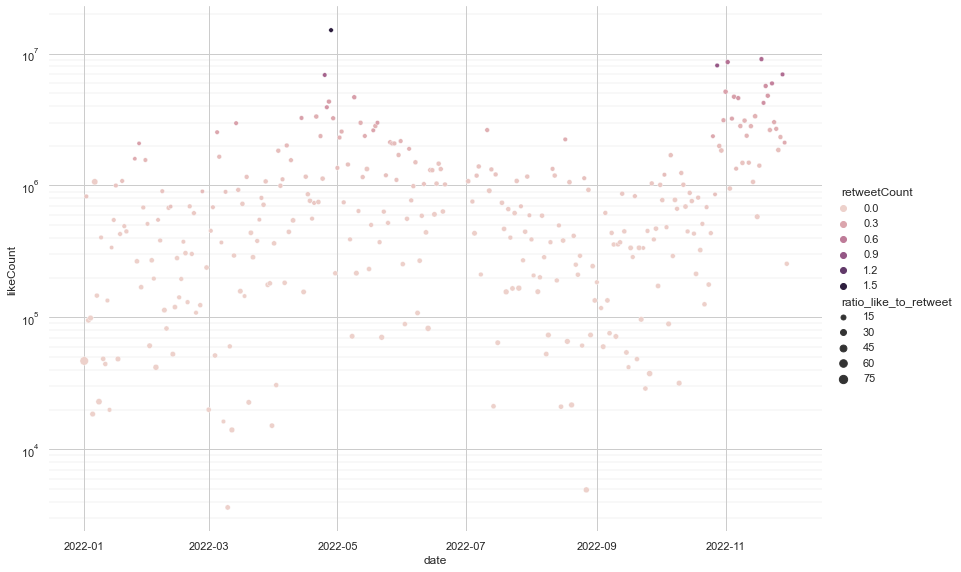

In [109]:
sns.set_theme(style="whitegrid")

sns.color_palette("dark:salmon_r", as_cmap=True)

#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=days,
    x="date", y="likeCount",
    hue="retweetCount",  size='ratio_like_to_retweet',
    height=8.27, aspect=11.7/8.27
)

g.set(yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

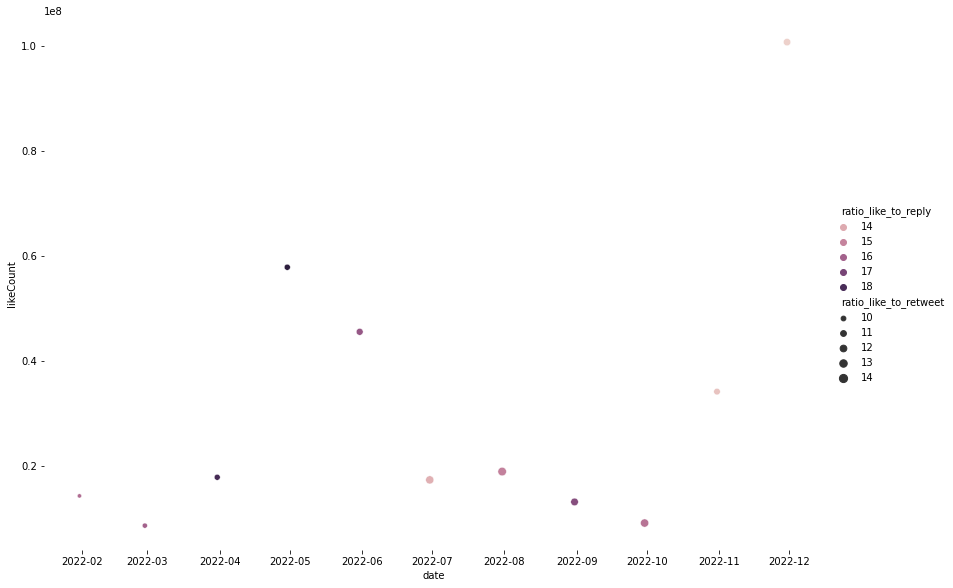

In [84]:
#sns.set_theme(style="whitegrid")
sns.color_palette("dark:salmon_r", as_cmap=True)

#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=months,
    x="date", y="likeCount",
    hue="ratio_like_to_reply", size='ratio_like_to_retweet',
    height=8.27, aspect=11.7/8.27
)

#g.set(yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [111]:
d_weeks = dict(tuple(df_1.groupby(pd.Grouper(key='date', freq='W-MON'))))
d_weeks

{Timestamp('2022-01-03 00:00:00+0000', tz='UTC', freq='W-MON'):                           date  replyCount  retweetCount  likeCount  \
 4100 2022-01-01 00:53:13+00:00         306           141       3898   
 4099 2022-01-01 01:58:52+00:00        1026           444      42845   
 4098 2022-01-02 17:56:50+00:00        5449          4216      63963   
 4097 2022-01-02 18:19:33+00:00       21460         25034     306893   
 4096 2022-01-02 22:56:00+00:00       24588         48212     456146   
 4095 2022-01-03 02:58:55+00:00         727           722      11533   
 4094 2022-01-03 18:31:27+00:00         425           254       4210   
 4093 2022-01-03 18:44:10+00:00        1314           603      13355   
 4092 2022-01-03 22:04:59+00:00        2771          2282      55444   
 4091 2022-01-03 22:05:41+00:00         190           147       3987   
 4090 2022-01-03 22:10:17+00:00         709           256       6547   
 
       quoteCount  ratio_like_to_reply  ratio_like_to_retweet  
 4100  

In [85]:
d = dict(tuple(df_1.groupby(pd.Grouper(key='date',freq='D'))))
d


{Timestamp('2022-01-01 00:00:00+0000', tz='UTC', freq='D'):                           date  replyCount  retweetCount  likeCount  \
 4100 2022-01-01 00:53:13+00:00         306           141       3898   
 4099 2022-01-01 01:58:52+00:00        1026           444      42845   
 
       quoteCount  ratio_like_to_reply  ratio_like_to_retweet  
 4100          13            12.738562              27.645390  
 4099          45            41.759259              96.497748  ,
 Timestamp('2022-01-02 00:00:00+0000', tz='UTC', freq='D'):                           date  replyCount  retweetCount  likeCount  \
 4098 2022-01-02 17:56:50+00:00        5449          4216      63963   
 4097 2022-01-02 18:19:33+00:00       21460         25034     306893   
 4096 2022-01-02 22:56:00+00:00       24588         48212     456146   
 
       quoteCount  ratio_like_to_reply  ratio_like_to_retweet  
 4098         311            11.738484              15.171490  
 4097        3990            14.300699              1

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
palette = sns.color_palette()
for year in len(d):
    ax.plot(, mort_df[str(year)], alpha=0.2, color=palette[0])
ax.set_xlim([0, 365])
ax.set_xticks(month_cutoff)
ax.set_title("Number of Daily Deaths in France, 2000 - 2020")
ax.set_xticklabels(month_names);

In [116]:
df_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   date                   4101 non-null   datetime64[ns, UTC]
 1   replyCount             4101 non-null   int64              
 2   retweetCount           4101 non-null   int64              
 3   likeCount              4101 non-null   int64              
 4   quoteCount             4101 non-null   int64              
 5   ratio_like_to_reply    4101 non-null   float64            
 6   ratio_like_to_retweet  4101 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(4)
memory usage: 224.4 KB


In [117]:
df_1.iloc[0,0].day_name()

'Wednesday'

In [118]:
df_1['day_of_week'] = df_1['date'].dt.day_name()
df_1


C:\Users\eyaak\AppData\Local\Temp\ipykernel_18160\667214862.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,replyCount,retweetCount,likeCount,quoteCount,ratio_like_to_reply,ratio_like_to_retweet,day_of_week
0,2022-11-30 09:39:14+00:00,289,55,959,16,3.318339,17.436364,Wednesday
1,2022-11-30 09:03:04+00:00,2048,2175,17658,243,8.622070,8.118621,Wednesday
2,2022-11-30 08:40:11+00:00,409,199,2721,19,6.652812,13.673367,Wednesday
3,2022-11-30 08:18:07+00:00,692,437,3443,59,4.975434,7.878719,Wednesday
4,2022-11-30 08:13:06+00:00,1197,732,9632,130,8.046784,13.158470,Wednesday
...,...,...,...,...,...,...,...,...
4096,2022-01-02 22:56:00+00:00,24588,48212,456146,5483,18.551570,9.461254,Sunday
4097,2022-01-02 18:19:33+00:00,21460,25034,306893,3990,14.300699,12.259048,Sunday
4098,2022-01-02 17:56:50+00:00,5449,4216,63963,311,11.738484,15.171490,Sunday
4099,2022-01-01 01:58:52+00:00,1026,444,42845,45,41.759259,96.497748,Saturday


In [131]:
day_of_week=df_1.drop('date', axis=1).groupby(df_1['day_of_week']).sum()
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex
day_of_week['Day_id'] = day_of_week.index
day_of_week['Day_id'] = day_of_week['Day_id'].map(sorterIndex)
day_of_week.sort_values('Day_id', inplace=True)

day_of_week



C:\Users\eyaak\AppData\Local\Temp\ipykernel_18160\3698605004.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,replyCount,retweetCount,likeCount,quoteCount,ratio_like_to_reply,ratio_like_to_retweet,Day_id
day_of_week,,,,,,,
Sunday,2539047,2980368,39918158,448858,10226.247194,11683.236430,0
Monday,4342747,4914379,57432850,892300,NaN,12878.522299,1
Tuesday,2784047,3464609,44233501,576917,20056.014977,12474.453399,2
Wednesday,3140723,3688158,44110240,733091,NaN,11197.986244,3
Thursday,3141783,4748950,56559397,833967,11028.972566,11762.986244,4
Friday,3713956,4410638,51402021,968735,NaN,11542.453811,5
Saturday,2803068,3530994,43307467,601696,9946.280690,10870.022242,6


In [132]:
fig = px.line(day_of_week, x=day_of_week.index, y="replyCount", title='Replies through the week')
fig.show()

In [133]:
fig = px.line(day_of_week, x=day_of_week.index, y="likeCount", title='Likes through the week')
fig.show()

In [134]:
fig = px.line(day_of_week, x=day_of_week.index, y="retweetCount", title='Retweets through the week')
fig.show()

In [135]:
fig = px.line(day_of_week, x=day_of_week.index, y="quoteCount", title='Quotes through the week')
fig.show()